# Final Project Unsupervised Learing- Group  6

In [1]:
# importing dependencies
import numpy as np, tensorflow as tf
from scipy.io import loadmat
from sklearn.decomposition import IncrementalPCA
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report

## Loading , EDA and exploring the dataset

In [2]:
# load data
data = loadmat('C:/Users/niyan/OneDrive/Desktop/umist_cropped.mat')

Images (views) of 20 different people.This dataset consists of 575 total images of 20 different people.The images are represented as an 8-bit (0-255) numeric array. Each image is stored as a matrix of size 112x92.The dataset also includes labels for each image containing the identity of the person in the image.


In [3]:
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'facedat', 'dirnames'])


In [4]:
print(data["__header__"])

b'MATLAB 5.0 MAT-file, Platform: GLNX86, Created on: Wed Aug 28 11:38:19 2002'


In [5]:
print(data["__version__"])

1.0


In [6]:
print(data["__globals__"])

[]


In [7]:
print(data["facedat"])

[[array([[[233, 234, 234, ..., 236, 230, 234],
          [234, 234, 234, ..., 235, 234, 232],
          [234, 234, 234, ..., 236, 233, 234],
          ...,
          [234, 234, 234, ..., 237, 232, 233],
          [234, 234, 234, ..., 236, 233, 234],
          [234, 234, 233, ..., 236, 234, 233]],

         [[234, 234, 234, ..., 236, 232, 233],
          [234, 234, 234, ..., 234, 233, 234],
          [234, 234, 234, ..., 235, 233, 233],
          ...,
          [234, 234, 234, ..., 236, 230, 234],
          [234, 234, 234, ..., 236, 234, 233],
          [234, 234, 234, ..., 237, 233, 230]],

         [[234, 233, 234, ..., 236, 232, 233],
          [234, 234, 233, ..., 235, 230, 234],
          [234, 234, 234, ..., 237, 233, 233],
          ...,
          [234, 234, 234, ..., 237, 232, 233],
          [234, 233, 234, ..., 239, 232, 233],
          [234, 232, 234, ..., 236, 230, 232]],

         ...,

         [[166, 190, 206, ..., 219, 215, 187],
          [177, 202, 208, ..., 216, 215, 

In [8]:
print(data["dirnames"])

[[array(['1a'], dtype='<U2') array(['1b'], dtype='<U2')
  array(['1c'], dtype='<U2') array(['1d'], dtype='<U2')
  array(['1e'], dtype='<U2') array(['1f'], dtype='<U2')
  array(['1g'], dtype='<U2') array(['1h'], dtype='<U2')
  array(['1i'], dtype='<U2') array(['1j'], dtype='<U2')
  array(['1k'], dtype='<U2') array(['1l'], dtype='<U2')
  array(['1m'], dtype='<U2') array(['1n'], dtype='<U2')
  array(['1o'], dtype='<U2') array(['1p'], dtype='<U2')
  array(['1q'], dtype='<U2') array(['1r'], dtype='<U2')
  array(['1s'], dtype='<U2') array(['1t'], dtype='<U2')]]


In [9]:
# printing the number of images
print(data["facedat"].shape)

(1, 20)


In [9]:
# observe and printing the shape of  each image
for i in range(0,len(data["facedat"][0])):
    print(data["facedat"][0][i].shape)

(112, 92, 38)
(112, 92, 35)
(112, 92, 26)
(112, 92, 24)
(112, 92, 26)
(112, 92, 23)
(112, 92, 19)
(112, 92, 22)
(112, 92, 20)
(112, 92, 32)
(112, 92, 34)
(112, 92, 34)
(112, 92, 26)
(112, 92, 30)
(112, 92, 19)
(112, 92, 26)
(112, 92, 26)
(112, 92, 33)
(112, 92, 48)
(112, 92, 34)


The highest number of images for a person is 48

In [10]:
# At first index, there are 32 images of size 112*92
data["facedat"][0][0].shape

(112, 92, 38)

Accessing elements from the "facedat" array in the umist_cropped dictionary and going through each element of the array, starting with the first one, and then going deeper into each element until it reaches the value of the element at the deepest level.

In [11]:
data["facedat"][0][0][0]

array([[233, 234, 234, ..., 236, 230, 234],
       [234, 234, 234, ..., 235, 234, 232],
       [234, 234, 234, ..., 236, 233, 234],
       ...,
       [234, 234, 234, ..., 237, 232, 233],
       [234, 234, 234, ..., 236, 233, 234],
       [234, 234, 233, ..., 236, 234, 233]], dtype=uint8)

In [12]:
data["facedat"][0][0][0][0]

array([233, 234, 234, 234, 234, 234, 234, 234, 234, 234, 234, 234, 236,
       234, 234, 234, 234, 234, 235, 235, 235, 235, 236, 236, 235, 236,
       239, 234, 236, 236, 235, 235, 235, 235, 234, 236, 230, 234],
      dtype=uint8)

In [13]:
data = data["facedat"][0]

In [14]:
# initialize data and target with empty list
face, target = list(), list()

In [15]:
# seperating data and target
label = 0
for batch in data:
    for sample in batch.T:
        sample = sample.T.reshape(-1)
        face.append(sample)
        target.append(label)
    del sample
    del batch
    label += 1
face, target = np.array(face), np.array(target)

In [16]:
print(face)
print(target)

[[233 234 234 ... 141 140 136]
 [234 234 234 ... 138 137 137]
 [234 234 234 ... 148 145 145]
 ...
 [ 39  43  43 ... 113 114 113]
 [ 49  49  45 ... 115 114 115]
 [ 15  28  17 ... 106  87  86]]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  7
  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  8  8  8
  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9
  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9
  9 1

## Splitting the dataset into test, train and validation

In [17]:
# using StratifiedShuffleSplit for splitting
from sklearn.model_selection import StratifiedShuffleSplit
splitter=StratifiedShuffleSplit(test_size=0.2,random_state=25) 

In [18]:
# splitting training and testing data
for train,test in splitter.split(face,target): 
    X_train_df = face[train]
    y_train_df= target[train]
    X_test_df = face[test]
    y_test_df = target[test]

In [19]:
# further splitting training data to training and validation data
for train,test in splitter.split(X_train_df,y_train_df): 
    X_train_df_final = face[train]
    y_train_df_final= target[train]
    X_val_df = face[test]
    y_val_df = target[test]

In [20]:
X_train_df.shape

(460, 10304)

In [21]:
X_train_df_final.shape

(368, 10304)

In [22]:
y_train_df.shape

(460,)

In [23]:
y_train_df_final.shape

(368,)

In [24]:
X_test_df.shape

(115, 10304)

In [25]:
y_test_df.shape

(115,)

In [26]:
X_val_df.shape

(92, 10304)

In [27]:
y_val_df.shape

(92,)

Plotting

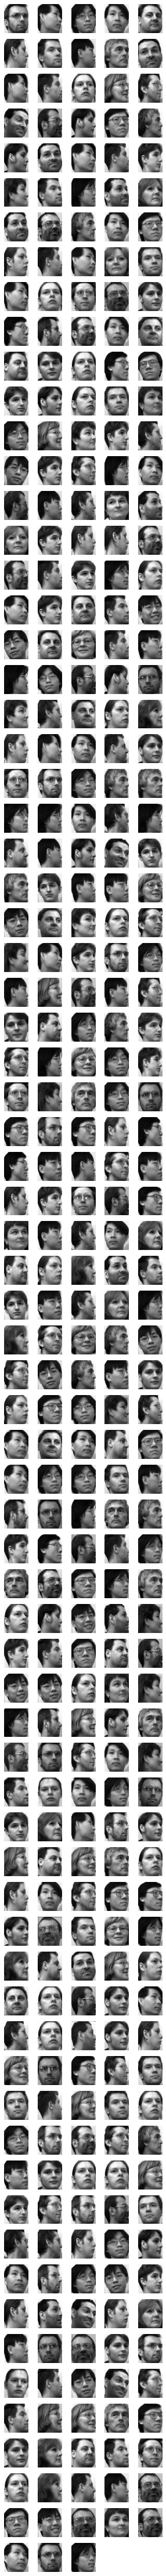

In [28]:
import matplotlib.pyplot as plt
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 112, 92)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
    plt.show()
    
plot_faces(X_train_df_final,y_train_df_final)

feature reduction using InvrementalPCA

In [29]:
# feature reduction
pca = IncrementalPCA(n_components=260)
face_reduced = pca.fit_transform(X_train_df_final)
print('explained variance ratio in sum:')
print(sum(pca.explained_variance_ratio_))

explained variance ratio in sum:
0.9945031520374567


In [30]:
face_reduced.shape

(368, 260)

## K-mean Clustering for dimentionality reduction

In [31]:
from sklearn.cluster import KMeans

In [32]:
k_range = range(5,200,5)
kmeans_per_k = []
for k in k_range:
    print("k={}".format(k))
    cluster = KMeans(n_clusters=k, random_state=25).fit(face_reduced)
    kmeans_per_k.append(cluster)

k=5
k=10
k=15
k=20
k=25
k=30
k=35
k=40
k=45
k=50
k=55
k=60
k=65
k=70
k=75
k=80
k=85
k=90
k=95
k=100
k=105
k=110
k=115
k=120
k=125
k=130
k=135
k=140
k=145
k=150
k=155
k=160
k=165
k=170
k=175
k=180
k=185
k=190
k=195


In [33]:
# find best k value from silhouette score
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(face_reduced, model.labels_) # metric='euclidean'
                     for model in kmeans_per_k]

#Summarize
best_index = np.argmax(silhouette_scores)
best_score = silhouette_scores[best_index]
best_k = k_range[best_index]

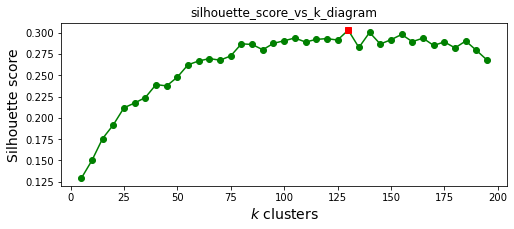

In [34]:
#Plot the scores
plt.figure(figsize=(8,3))
plt.plot(k_range, silhouette_scores, "go-")
plt.ylabel("Silhouette score", fontsize=14)
plt.xlabel("$k$ clusters", fontsize=14)
plt.plot(best_k, best_score, "rs")
plt.title("silhouette_score_vs_k_diagram")
plt.show()

best k value:  130


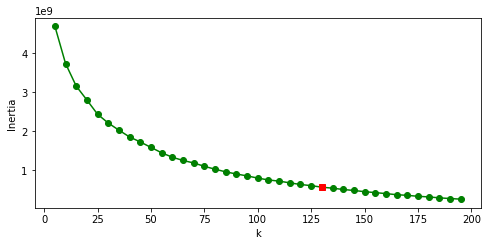

In [35]:
#verify the best k using Inertia function
print("best k value: ", best_k)

inertias = [model.inertia_ for model in kmeans_per_k]
best_inertia = inertias[best_index]

plt.figure(figsize=(8,3.5))
plt.plot(k_range, inertias, "go-")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.plot(best_k, best_inertia,"rs")
plt.show()

In [36]:
best_model = kmeans_per_k[best_index]
best_model

KMeans(n_clusters=130, random_state=25)

In [37]:
# Define random state
rs = 42

In [38]:
#Define KMeans cluster with best k=130
kmeans = KMeans(n_clusters=130,random_state=rs).fit(face_reduced)

In [39]:
Y_kmeans = kmeans.labels_
Y_kmeans.shape

(368,)

In [40]:
Y_kmeans

array([127,  17, 111,  28,  98,  35,  43,  37,  77, 107,  61, 116,  92,
         8,  62,  44, 103,  39,  13,  91,  94,  11,  17,  19,  18,  97,
        31,  47,  93,  46,  90,  26,  91,  28,  13,   6,  19,  17,  67,
        40,  17,  92,  14,  26, 128,  66,   4,  78,  28,  24,  98,  83,
         5, 119, 121,  50, 110,  41,  33,  27,  56,  54,  58,  18,  12,
        71,   3,  23,  47,   7, 104,  37,  12, 115,  93,  67,   3,  53,
        35,  78,  36, 116,  50,  69,  22,  42,   3, 118, 102,  30, 126,
       118, 108,  60, 117,  47,  70,  38,  39,  48,  58, 114,  24,  22,
        87, 109,  61,   7, 122,  16,  14,   2,  56,   0, 113,  69,  47,
        68,  52,  47, 122,  95,  94,  44,  79, 113,  79,  20,  29, 100,
        88,  24,  58,  41,  10,  97,  17,   3,   2, 106,  37,  65,  36,
        20,  62,  83,  63, 106,  91,   3,  85,  47, 100,  56,  18,  81,
        15,  34,  56,  96,  55,  75,  32, 109,  80,  80,  84,  95,  10,
        29,  35,  18,  14,  38,  64,  27, 117,  12,  51, 101,  6

In [41]:
# One-hot encode the target
# We use this as target values in our CNN model
from tensorflow.keras.utils import to_categorical
y_kmeans = to_categorical(Y_kmeans)
y_kmeans.shape

(368, 130)

In [42]:
# for label in np.unique(Y_kmeans):
#   print("Cluster", label)
#   index = Y_kmeans == label
#   faces = face_reduced[index]
#   labels = y_train_df_final[index]
#   # plot the faces
#   plot_faces(faces, labels)

In [43]:
y_kmeans[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [44]:
np.argmax(y_kmeans[0])

127

In [45]:
X_train_reduced = best_model.transform(face_reduced) #use K-Means as a dimensionality reduction tool

In [46]:
X_train_reduced.shape

(368, 130)

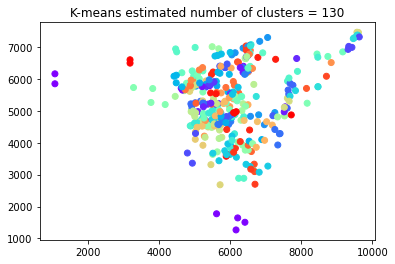

In [47]:
plt.scatter(X_train_reduced[:,0],X_train_reduced[:,1], c=best_model.labels_, cmap='rainbow')
plt.title(f"K-means estimated number of clusters = {1+np.amax(best_model.labels_)}")
plt.show()

# Gaussian Mixture 

In [48]:
from sklearn.mixture import GaussianMixture

In [49]:
#full
gm_full = GaussianMixture(n_components=3, n_init=10, covariance_type="full", random_state=25)
gm_full.fit(face_reduced)

GaussianMixture(n_components=3, n_init=10, random_state=25)

In [50]:
#tied
gm_tied = GaussianMixture(n_components=3, n_init=10, covariance_type="tied", random_state=25)
gm_tied.fit(face_reduced)

GaussianMixture(covariance_type='tied', n_components=3, n_init=10,
                random_state=25)

In [51]:
#spherical
gm_spherical = GaussianMixture(n_components=3, n_init=10, covariance_type="spherical", random_state=25)
gm_spherical.fit(face_reduced)

GaussianMixture(covariance_type='spherical', n_components=3, n_init=10,
                random_state=25)

In [52]:
#diagonal
gm_diag = GaussianMixture(n_components=3, n_init=10, covariance_type="diag", random_state=25)
gm_diag.fit(face_reduced)

GaussianMixture(covariance_type='diag', n_components=3, n_init=10,
                random_state=25)

In [53]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=25).fit(face_reduced)
             for k in range(1, 11)]

C:\Users\niyan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\niyan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\niyan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\niyan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Window

In [54]:
bics = [model.bic(face_reduced) for model in gms_per_k]
aics = [model.aic(face_reduced) for model in gms_per_k]

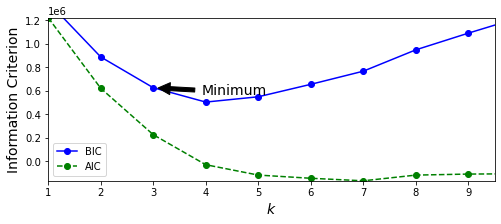

In [55]:
import matplotlib.pyplot as plt
import numpy as np 

plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([1, 9.5, np.min(aics) - 50, np.max(aics) + 50])
plt.annotate('Minimum',
             xy=(3, bics[2]),
             xytext=(0.35, 0.6),
             textcoords='figure fraction',
             fontsize=14,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.legend()
plt.show()

In [56]:
min_bic = np.infty

for k in range(1, 11):
    for covariance_type in ("full", "tied", "spherical", "diag"):
        bic = GaussianMixture(n_components=k, n_init=10,
                              covariance_type=covariance_type,
                              random_state=25).fit(face_reduced).bic(face_reduced)
        if bic < min_bic:
            min_bic = bic
            best_k = k
            best_covariance_type = covariance_type

C:\Users\niyan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\niyan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\niyan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\niyan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Window

In [58]:
best_k

4

In [59]:
best_covariance_type

'full'

In [58]:
y_fit_gaus = gm_full.fit_predict(face_reduced)

In [59]:
y_fit_gaus

array([1, 0, 0, 1, 1, 2, 1, 2, 1, 1, 0, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0, 1,
       0, 2, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 2, 2, 0, 0, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 0, 1, 2, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0,
       0, 1, 0, 1, 2, 2, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 0, 1, 1, 0, 1,
       2, 0, 0, 1, 0, 2, 0, 0, 0, 2, 0, 1, 0, 2, 1, 1, 0, 2, 0, 1, 2, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 1, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 2, 2, 0, 2, 1, 0, 2, 0, 1, 2, 0, 0,
       0, 2, 1, 0, 1, 1, 0, 1, 2, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 2,
       0, 1, 1, 0, 0, 0, 2, 1, 1, 1, 2, 1, 1, 0, 0, 1, 2, 2, 1, 0, 1, 0,
       0, 2, 2, 2, 0, 1, 1, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2, 1, 1, 2, 0, 0,
       1, 0, 0, 0, 2, 0, 0, 1, 2, 1, 1, 1, 0, 2, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 2, 1, 0, 1, 1,
       1, 2, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 2, 1, 1,

In [60]:
# one hot encoding
from tensorflow.keras.utils import to_categorical
y_gaussian = to_categorical(y_fit_gaus)
y_gaussian.shape

(368, 3)

# Agglomerative Clustering using Euclidean Clustering

In [62]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

Exploration

In [81]:
Agglo_clf_euc = AgglomerativeClustering(affinity="euclidean",linkage="complete")

In [82]:
Agglo_clf_euc.fit(face_reduced)

AgglomerativeClustering(linkage='complete')

In [83]:
Agglo_clf_euc.n_clusters

2

In [84]:
labels_euc = Agglo_clf_euc.labels_  

In [85]:
labels_euc

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,

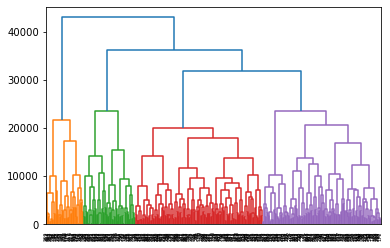

In [98]:
#Creating dendogram to check correct number of clusters
dnd = sch.dendrogram(sch.linkage(face_reduced, method='ward'))

In [87]:
#Sihouette score for agglomerative clustering(using Euclidean distance)
k_range = range(5,200,5)
agglo_euc_per_k = []
for k in k_range:
    print("k={}".format(k))
    agglo = AgglomerativeClustering(n_clusters=k,affinity="euclidean",linkage="complete").fit(face_reduced)
    agglo_euc_per_k.append(agglo)

k=5
k=10
k=15
k=20
k=25
k=30
k=35
k=40
k=45
k=50
k=55
k=60
k=65
k=70
k=75
k=80
k=85
k=90
k=95
k=100
k=105
k=110
k=115
k=120
k=125
k=130
k=135
k=140
k=145
k=150
k=155
k=160
k=165
k=170
k=175
k=180
k=185
k=190
k=195


In [88]:
silhouette_scores = [silhouette_score(X_train_df_final, model.labels_)
                     for model in agglo_euc_per_k 
                    ]
euc_best_index = np.argmax(silhouette_scores)
euc_best_score = silhouette_scores[euc_best_index]
euc_best_k = k_range[euc_best_index]
euc_best_k

115

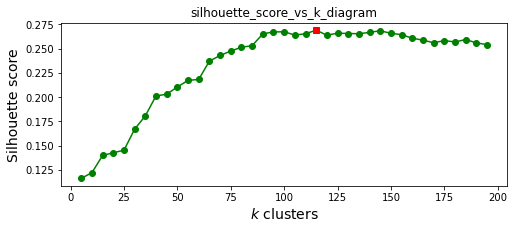

In [89]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,3))
plt.plot(k_range, silhouette_scores, "go-")
plt.ylabel("Silhouette score", fontsize=14)
plt.xlabel("$k$ clusters", fontsize=14)
plt.plot(euc_best_k, euc_best_score, "rs")
plt.title("silhouette_score_vs_k_diagram")
plt.show()

In [90]:
euc_best_model = agglo_euc_per_k[euc_best_index]

In [91]:
euc_best_model

AgglomerativeClustering(linkage='complete', n_clusters=115)

In [92]:
#generate target
y_pred_euc_agg = euc_best_model.fit_predict(face_reduced)

In [94]:
y_pred_euc_agg

array([ 19, 100,  80,  90,  48,  68,  82,  24,  67, 112, 104,   2, 105,
         3,  32,  10,  15,  49,  33,  12,  49,  21,  50,  65,  44,   1,
        31,   6,  18,  17,  45,  20,  12,  92,  33, 106,  65,  50,   0,
        74,  50, 105,  58,  20,  60,  23,  35,  18,  90,  16,  37,  30,
         8,  83,  71,  43,  34,  70,  77,  14,  80, 108,  63,  44,  27,
        85, 110,  88,   6,  59,  26,  24,  27,  84,   5,   0, 110,  68,
        98,  18,   5,   2,  43,   7,  11,  52, 110,  21, 103,  29, 113,
        48,   0,   2,  89,   6,  61,  15,  94,  73,   1,  51,  16,  11,
        86,  28, 104,  92,  35,  60,  58,  19,  80,  12,   3,   7,   6,
         4,  56,   6,  35,  24,  49,  10,  41,   3,  41,  55,  89,  17,
        38,  16,  63,  72,  91,   1, 100, 110,  19,  36,  24, 108,   5,
        55,  32,  30,  78,  36,  12, 110,  81,   6,  47,  80,  44,  22,
         1,  57,  80,  21,  46,  96,  99,  64,  42,  42,  13,  24,  91,
        89,  68,  44, 109,  26,  40,  14,  55,  27,   4,  17,  7

In [97]:
# One-hot encode the target
# We use this as target values in our CNN model
from tensorflow.keras.utils import to_categorical
y_HAC_euc = to_categorical(y_pred_euc_agg)
y_HAC_euc.shape

(368, 115)

In [63]:
# cluster = AgglomerativeClustering(n_clusters=20, affinity='euclidean', linkage='ward', compute_full_tree=True)

# # Cluster the data
# cluster.fit_predict(face_reduced)
# print(f"Number of clusters ward = {1+np.amax(cluster.labels_)}")
# AHC_labels = cluster.labels_

Number of clusters ward = 20


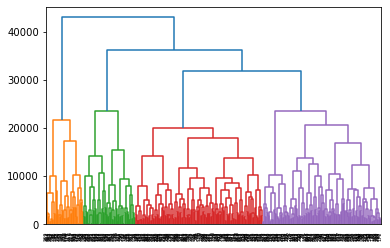

In [64]:
#Creating dendogram to check correct number of clusters
# dnd = sch.dendrogram(sch.linkage(face_reduced, method='ward'))

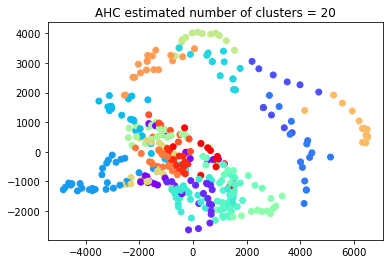

In [70]:
#Plotting
# plt.scatter(face_reduced[:,0],face_reduced[:,1], c=cluster.labels_, cmap='rainbow')
# plt.title(f"AHC estimated number of clusters = {1+np.amax(cluster.labels_)}")
# plt.show()

# AgglomerativeClustering(using Manhattan distance)

In [66]:
from sklearn.cluster import AgglomerativeClustering

In [67]:
Agglo_clf_manhattan = AgglomerativeClustering(affinity="manhattan",linkage="complete")

In [68]:
Agglo_clf_manhattan.fit(face_reduced)

AgglomerativeClustering(affinity='manhattan', linkage='complete')

In [69]:
Agglo_clf_manhattan.n_clusters

2

In [70]:
labels_manhattan = Agglo_clf_manhattan.labels_ 

In [71]:
labels_manhattan

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,

In [73]:
#Sihoutte score (Manhattan distance)
agglo_man_per_k = []
for k in k_range:
    print("k={}".format(k))
    agglo = AgglomerativeClustering(n_clusters=k,affinity="manhattan",linkage="complete").fit(face_reduced)
    agglo_man_per_k.append(agglo)

k=5
k=10
k=15
k=20
k=25
k=30
k=35
k=40
k=45
k=50
k=55
k=60
k=65
k=70
k=75
k=80
k=85
k=90
k=95
k=100
k=105
k=110
k=115
k=120
k=125
k=130
k=135
k=140
k=145
k=150
k=155
k=160
k=165
k=170
k=175
k=180
k=185
k=190
k=195


In [74]:
silhouette_scores = [silhouette_score(face_reduced, model.labels_)
                     for model in agglo_man_per_k]
man_best_index = np.argmax(silhouette_scores)
man_best_score = silhouette_scores[man_best_index]
man_best_k = k_range[man_best_index]
man_best_k

145

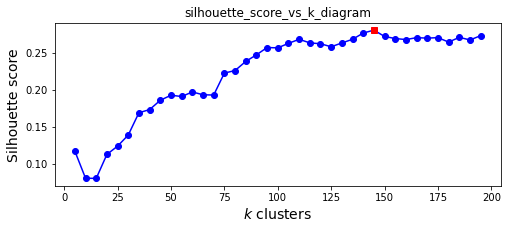

In [75]:
plt.figure(figsize=(8,3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.ylabel("Silhouette score", fontsize=14)
plt.xlabel("$k$ clusters", fontsize=14)
plt.plot(man_best_k, man_best_score, "rs")
plt.title("silhouette_score_vs_k_diagram")
plt.show()

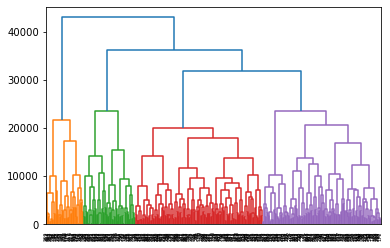

In [155]:
#Creating dendogram to check correct number of clusters
dnd2 = sch.dendrogram(sch.linkage(face_reduced, method='ward'))

In [76]:
man_best_model = agglo_man_per_k[man_best_index]

In [77]:
man_best_model

AgglomerativeClustering(affinity='manhattan', linkage='complete',
                        n_clusters=145)

In [95]:
Y_pred_man_agg=man_best_model.fit_predict(face_reduced)

In [96]:
Y_pred_man_agg

array([ 91, 107,  80,  26,  87,   8, 131,  72,  29,  83,  89,  23,  35,
        12,  18, 105, 129,  66, 110,  88,  66, 122,  75,  42,  68,  44,
        32,  19, 127,  69,  37, 136,  41,  50, 110,  76,  42,  75,  28,
        81,  75,  35,  84,  47,  25, 141,  17,  36,  26,  54,  87,  55,
       133,  77, 117, 144,  49, 103,  33,  51,  80,  12,  27,  68,   9,
        95,  68, 100,  19,  13, 139,  72,   9,  86,  62,  28,  68,  20,
         8,  36, 112,  23, 104,  94, 109,  24,  68, 138, 108,   0, 113,
        30, 102,  52,  45,  58, 135,  79,  96, 142,  44,  53,  54, 109,
        34,  56,  89,  50,  17,  25,  84,  65,  80,  41, 143,  94,  19,
        59, 116,  58,  17, 134,  66,  99, 137, 143, 137,  15,  45, 123,
         6,  54,  27, 103, 115,  44, 107,  68,  65,  57,  72,  34, 112,
        15,  18,  55,  39,  57,  41, 111,  82,  19,   1,  80, 118, 125,
        60,   4,  80,   5,  61, 130,  78,  63,  31,  31,  16, 134, 115,
        45,   8,  68, 132, 124,  43,  70,  15,   9, 106,  69,  3

In [100]:
# # One-hot encode the target Manhattan
# # We use this as target values in our CNN model
from tensorflow.keras.utils import to_categorical
y_HAC_mah = to_categorical(Y_pred_man_agg)
y_HAC_mah.shape

(368, 145)

# CNN MODEL

In [103]:
face_reduced.shape

(368, 260)

In [104]:
y_kmeans.shape

(368, 130)

In [105]:
y_gaussian.shape

(368, 3)

In [106]:
y_HAC_euc.shape

(368, 115)

In [107]:
y_HAC_mah.shape

(368, 145)

In [108]:
# Reshape to 4d-array dataset to feed CNN
img_width = 92
img_height = 112
X_cnn_train = X_train_df_final.reshape(-1, img_width, img_height, 1)

In [109]:
X_cnn_train.shape

(368, 92, 112, 1)

In [110]:
X_cnn_valid = X_val_df.reshape(-1, img_width, img_height, 1)

In [111]:
X_cnn_valid.shape

(92, 92, 112, 1)

In [112]:
X_cnn_test = X_test_df.reshape(-1, img_width, img_height, 1)

In [113]:
X_cnn_test.shape

(115, 92, 112, 1)

In [114]:
 # developing the model
    
from tensorflow.keras import Sequential, layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D

def create_model(in_shape, out_shape,
                 first_filters=200, second_filters=100, kernel_size=(3,3)):

    # Define model
    model = Sequential()
    # 1st Conv
    model.add(Conv2D(first_filters, kernel_size, strides=(1,1),
                    activation="relu",
                    padding="valid", input_shape=in_shape))
    model.add(MaxPooling2D((3,3), strides=(1,1), padding="valid"))
    # 2nd Conv
    model.add(Conv2D(second_filters, kernel_size, activation="relu"))
    model.add(MaxPooling2D((3,3)))
    # Flatten Layer
    model.add(layers.Flatten())
    # Dropout layer to reduce overfitting (50%)
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64, activation="relu"))
    # Final layer
    model.add(layers.Dense(out_shape, activation="softmax"))

    model.summary()
    return model

In [117]:
input = X_cnn_train.shape[1:]
k_means_output = y_kmeans.shape[1]

In [119]:
gm_output = y_gaussian.shape[1]

In [136]:
hac_euc_output = y_HAC_euc.shape[1]

In [151]:
hac_man_output = y_HAC_mah.shape[1]

In [123]:
# running CNN for kmeans
model_kmeans = create_model(input, k_means_output) # pass the output shape of your cluster

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 90, 110, 200)      2000      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 88, 108, 200)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 86, 106, 100)      180100    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 35, 100)      0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 98000)             0         
                                                                 
 dropout (Dropout)           (None, 98000)             0

In [124]:
model_kmeans.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["acc"])

In [125]:
X_cnn_train.shape

(368, 92, 112, 1)

In [126]:
y_kmeans.shape

(368, 130)

In [127]:
# Train the model
import tensorflow.keras as keras
history = model_kmeans.fit(X_cnn_train, y_kmeans, # pass your cluster generated train targets
                    epochs=20,
                    callbacks=[keras.callbacks.ModelCheckpoint(
                        filepath="./checkpoints_kmeans")])

Epoch 1/20
12/12 [==============================] - ETA: 0s - loss: 38.4591 - acc: 0.0109

INFO:tensorflow:Assets written to: .\checkpoints_kmeans\assets


INFO:tensorflow:Assets written to: .\checkpoints_kmeans\assets


12/12 [==============================] - 37s 3s/step - loss: 38.4591 - acc: 0.0109
Epoch 2/20
12/12 [==============================] - ETA: 0s - loss: 4.7892 - acc: 0.0245

INFO:tensorflow:Assets written to: .\checkpoints_kmeans\assets


INFO:tensorflow:Assets written to: .\checkpoints_kmeans\assets


12/12 [==============================] - 30s 2s/step - loss: 4.7892 - acc: 0.0245
Epoch 3/20
12/12 [==============================] - ETA: 0s - loss: 4.5716 - acc: 0.0652

INFO:tensorflow:Assets written to: .\checkpoints_kmeans\assets


INFO:tensorflow:Assets written to: .\checkpoints_kmeans\assets


12/12 [==============================] - 35s 3s/step - loss: 4.5716 - acc: 0.0652
Epoch 4/20
12/12 [==============================] - ETA: 0s - loss: 4.3762 - acc: 0.1060

INFO:tensorflow:Assets written to: .\checkpoints_kmeans\assets


INFO:tensorflow:Assets written to: .\checkpoints_kmeans\assets


12/12 [==============================] - 37s 3s/step - loss: 4.3762 - acc: 0.1060
Epoch 5/20
12/12 [==============================] - ETA: 0s - loss: 3.7029 - acc: 0.2391

INFO:tensorflow:Assets written to: .\checkpoints_kmeans\assets


INFO:tensorflow:Assets written to: .\checkpoints_kmeans\assets


12/12 [==============================] - 35s 3s/step - loss: 3.7029 - acc: 0.2391
Epoch 6/20
12/12 [==============================] - ETA: 0s - loss: 2.9639 - acc: 0.3533

INFO:tensorflow:Assets written to: .\checkpoints_kmeans\assets


INFO:tensorflow:Assets written to: .\checkpoints_kmeans\assets


12/12 [==============================] - 36s 3s/step - loss: 2.9639 - acc: 0.3533
Epoch 7/20
12/12 [==============================] - ETA: 0s - loss: 1.7653 - acc: 0.6033

INFO:tensorflow:Assets written to: .\checkpoints_kmeans\assets


INFO:tensorflow:Assets written to: .\checkpoints_kmeans\assets


12/12 [==============================] - 38s 3s/step - loss: 1.7653 - acc: 0.6033
Epoch 8/20
12/12 [==============================] - ETA: 0s - loss: 1.4445 - acc: 0.6576

INFO:tensorflow:Assets written to: .\checkpoints_kmeans\assets


INFO:tensorflow:Assets written to: .\checkpoints_kmeans\assets


12/12 [==============================] - 34s 3s/step - loss: 1.4445 - acc: 0.6576
Epoch 9/20
12/12 [==============================] - ETA: 0s - loss: 0.9550 - acc: 0.7935

INFO:tensorflow:Assets written to: .\checkpoints_kmeans\assets


INFO:tensorflow:Assets written to: .\checkpoints_kmeans\assets


12/12 [==============================] - 35s 3s/step - loss: 0.9550 - acc: 0.7935
Epoch 10/20
12/12 [==============================] - ETA: 0s - loss: 0.6223 - acc: 0.8424

INFO:tensorflow:Assets written to: .\checkpoints_kmeans\assets


INFO:tensorflow:Assets written to: .\checkpoints_kmeans\assets


12/12 [==============================] - 35s 3s/step - loss: 0.6223 - acc: 0.8424
Epoch 11/20
12/12 [==============================] - ETA: 0s - loss: 0.3731 - acc: 0.9022

INFO:tensorflow:Assets written to: .\checkpoints_kmeans\assets


INFO:tensorflow:Assets written to: .\checkpoints_kmeans\assets


12/12 [==============================] - 35s 3s/step - loss: 0.3731 - acc: 0.9022
Epoch 12/20
12/12 [==============================] - ETA: 0s - loss: 0.3729 - acc: 0.9049

INFO:tensorflow:Assets written to: .\checkpoints_kmeans\assets


INFO:tensorflow:Assets written to: .\checkpoints_kmeans\assets


12/12 [==============================] - 35s 3s/step - loss: 0.3729 - acc: 0.9049
Epoch 13/20
12/12 [==============================] - ETA: 0s - loss: 0.3980 - acc: 0.9239

INFO:tensorflow:Assets written to: .\checkpoints_kmeans\assets


INFO:tensorflow:Assets written to: .\checkpoints_kmeans\assets


12/12 [==============================] - 35s 3s/step - loss: 0.3980 - acc: 0.9239
Epoch 14/20
12/12 [==============================] - ETA: 0s - loss: 0.2762 - acc: 0.9348

INFO:tensorflow:Assets written to: .\checkpoints_kmeans\assets


INFO:tensorflow:Assets written to: .\checkpoints_kmeans\assets


12/12 [==============================] - 34s 3s/step - loss: 0.2762 - acc: 0.9348
Epoch 15/20
12/12 [==============================] - ETA: 0s - loss: 0.2000 - acc: 0.9565

INFO:tensorflow:Assets written to: .\checkpoints_kmeans\assets


INFO:tensorflow:Assets written to: .\checkpoints_kmeans\assets


12/12 [==============================] - 35s 3s/step - loss: 0.2000 - acc: 0.9565
Epoch 16/20
12/12 [==============================] - ETA: 0s - loss: 0.2251 - acc: 0.9538

INFO:tensorflow:Assets written to: .\checkpoints_kmeans\assets


INFO:tensorflow:Assets written to: .\checkpoints_kmeans\assets


12/12 [==============================] - 36s 3s/step - loss: 0.2251 - acc: 0.9538
Epoch 17/20
12/12 [==============================] - ETA: 0s - loss: 0.3356 - acc: 0.9239

INFO:tensorflow:Assets written to: .\checkpoints_kmeans\assets


INFO:tensorflow:Assets written to: .\checkpoints_kmeans\assets


12/12 [==============================] - 34s 3s/step - loss: 0.3356 - acc: 0.9239
Epoch 18/20
12/12 [==============================] - ETA: 0s - loss: 0.2940 - acc: 0.9293

INFO:tensorflow:Assets written to: .\checkpoints_kmeans\assets


INFO:tensorflow:Assets written to: .\checkpoints_kmeans\assets


12/12 [==============================] - 34s 3s/step - loss: 0.2940 - acc: 0.9293
Epoch 19/20
12/12 [==============================] - ETA: 0s - loss: 0.1989 - acc: 0.9538

INFO:tensorflow:Assets written to: .\checkpoints_kmeans\assets


INFO:tensorflow:Assets written to: .\checkpoints_kmeans\assets


12/12 [==============================] - 35s 3s/step - loss: 0.1989 - acc: 0.9538
Epoch 20/20
12/12 [==============================] - ETA: 0s - loss: 0.2527 - acc: 0.9375

INFO:tensorflow:Assets written to: .\checkpoints_kmeans\assets


INFO:tensorflow:Assets written to: .\checkpoints_kmeans\assets


12/12 [==============================] - 35s 3s/step - loss: 0.2527 - acc: 0.9375


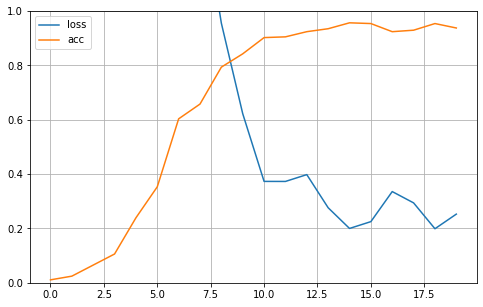

In [128]:
# Plot the training process
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
# running cnn for gaussian

In [129]:
model_gaussian = create_model(input, gm_output)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 90, 110, 200)      2000      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 88, 108, 200)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 86, 106, 100)      180100    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 28, 35, 100)      0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 98000)             0         
                                                                 
 dropout_1 (Dropout)         (None, 98000)            

In [130]:
model_gaussian.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["acc"])

In [132]:
# Train the model
import tensorflow.keras as keras
history_gaussian =model_gaussian.fit(X_cnn_train, y_gaussian, # pass your cluster generated train targets
                    epochs=20,
                    callbacks=[keras.callbacks.ModelCheckpoint(
                        filepath="./checkpoints_gmm")])

Epoch 1/20
12/12 [==============================] - ETA: 0s - loss: 149.4434 - acc: 0.3451

INFO:tensorflow:Assets written to: .\checkpoints_gmm\assets


INFO:tensorflow:Assets written to: .\checkpoints_gmm\assets


12/12 [==============================] - 30s 2s/step - loss: 149.4434 - acc: 0.3451
Epoch 2/20
12/12 [==============================] - ETA: 0s - loss: 1.1594 - acc: 0.3995

INFO:tensorflow:Assets written to: .\checkpoints_gmm\assets


INFO:tensorflow:Assets written to: .\checkpoints_gmm\assets


12/12 [==============================] - 31s 3s/step - loss: 1.1594 - acc: 0.3995
Epoch 3/20
12/12 [==============================] - ETA: 0s - loss: 1.0973 - acc: 0.4457

INFO:tensorflow:Assets written to: .\checkpoints_gmm\assets


INFO:tensorflow:Assets written to: .\checkpoints_gmm\assets


12/12 [==============================] - 36s 3s/step - loss: 1.0973 - acc: 0.4457
Epoch 4/20
12/12 [==============================] - ETA: 0s - loss: 1.0957 - acc: 0.4457

INFO:tensorflow:Assets written to: .\checkpoints_gmm\assets


INFO:tensorflow:Assets written to: .\checkpoints_gmm\assets


12/12 [==============================] - 36s 3s/step - loss: 1.0957 - acc: 0.4457
Epoch 5/20
12/12 [==============================] - ETA: 0s - loss: 1.0937 - acc: 0.4457

INFO:tensorflow:Assets written to: .\checkpoints_gmm\assets


INFO:tensorflow:Assets written to: .\checkpoints_gmm\assets


12/12 [==============================] - 36s 3s/step - loss: 1.0937 - acc: 0.4457
Epoch 6/20
12/12 [==============================] - ETA: 0s - loss: 1.0919 - acc: 0.4457

INFO:tensorflow:Assets written to: .\checkpoints_gmm\assets


INFO:tensorflow:Assets written to: .\checkpoints_gmm\assets


12/12 [==============================] - 36s 3s/step - loss: 1.0919 - acc: 0.4457
Epoch 7/20
12/12 [==============================] - ETA: 0s - loss: 1.0900 - acc: 0.4457

INFO:tensorflow:Assets written to: .\checkpoints_gmm\assets


INFO:tensorflow:Assets written to: .\checkpoints_gmm\assets


12/12 [==============================] - 35s 3s/step - loss: 1.0900 - acc: 0.4457
Epoch 8/20
12/12 [==============================] - ETA: 0s - loss: 1.0878 - acc: 0.4457

INFO:tensorflow:Assets written to: .\checkpoints_gmm\assets


INFO:tensorflow:Assets written to: .\checkpoints_gmm\assets


12/12 [==============================] - 35s 3s/step - loss: 1.0878 - acc: 0.4457
Epoch 9/20
12/12 [==============================] - ETA: 0s - loss: 1.0855 - acc: 0.4457

INFO:tensorflow:Assets written to: .\checkpoints_gmm\assets


INFO:tensorflow:Assets written to: .\checkpoints_gmm\assets


12/12 [==============================] - 36s 3s/step - loss: 1.0855 - acc: 0.4457
Epoch 10/20
12/12 [==============================] - ETA: 0s - loss: 1.0835 - acc: 0.4457

INFO:tensorflow:Assets written to: .\checkpoints_gmm\assets


INFO:tensorflow:Assets written to: .\checkpoints_gmm\assets


12/12 [==============================] - 37s 3s/step - loss: 1.0835 - acc: 0.4457
Epoch 11/20
12/12 [==============================] - ETA: 0s - loss: 1.0813 - acc: 0.4457 

INFO:tensorflow:Assets written to: .\checkpoints_gmm\assets


INFO:tensorflow:Assets written to: .\checkpoints_gmm\assets


12/12 [==============================] - 456s 41s/step - loss: 1.0813 - acc: 0.4457
Epoch 12/20
12/12 [==============================] - ETA: 0s - loss: 1.0793 - acc: 0.4457

INFO:tensorflow:Assets written to: .\checkpoints_gmm\assets


INFO:tensorflow:Assets written to: .\checkpoints_gmm\assets


12/12 [==============================] - 29s 2s/step - loss: 1.0793 - acc: 0.4457
Epoch 13/20
12/12 [==============================] - ETA: 0s - loss: 1.0774 - acc: 0.4457

INFO:tensorflow:Assets written to: .\checkpoints_gmm\assets


INFO:tensorflow:Assets written to: .\checkpoints_gmm\assets


12/12 [==============================] - 30s 2s/step - loss: 1.0774 - acc: 0.4457
Epoch 14/20
12/12 [==============================] - ETA: 0s - loss: 1.0753 - acc: 0.4457

INFO:tensorflow:Assets written to: .\checkpoints_gmm\assets


INFO:tensorflow:Assets written to: .\checkpoints_gmm\assets


12/12 [==============================] - 30s 2s/step - loss: 1.0753 - acc: 0.4457
Epoch 15/20
12/12 [==============================] - ETA: 0s - loss: 1.0736 - acc: 0.4457

INFO:tensorflow:Assets written to: .\checkpoints_gmm\assets


INFO:tensorflow:Assets written to: .\checkpoints_gmm\assets


12/12 [==============================] - 30s 2s/step - loss: 1.0736 - acc: 0.4457
Epoch 16/20
12/12 [==============================] - ETA: 0s - loss: 1.0717 - acc: 0.4457

INFO:tensorflow:Assets written to: .\checkpoints_gmm\assets


INFO:tensorflow:Assets written to: .\checkpoints_gmm\assets


12/12 [==============================] - 31s 3s/step - loss: 1.0717 - acc: 0.4457
Epoch 17/20
12/12 [==============================] - ETA: 0s - loss: 1.0702 - acc: 0.4457

INFO:tensorflow:Assets written to: .\checkpoints_gmm\assets


INFO:tensorflow:Assets written to: .\checkpoints_gmm\assets


12/12 [==============================] - 33s 3s/step - loss: 1.0702 - acc: 0.4457
Epoch 18/20
12/12 [==============================] - ETA: 0s - loss: 1.0686 - acc: 0.4457

INFO:tensorflow:Assets written to: .\checkpoints_gmm\assets


INFO:tensorflow:Assets written to: .\checkpoints_gmm\assets


12/12 [==============================] - 37s 3s/step - loss: 1.0686 - acc: 0.4457
Epoch 19/20
12/12 [==============================] - ETA: 0s - loss: 1.0673 - acc: 0.4457

INFO:tensorflow:Assets written to: .\checkpoints_gmm\assets


INFO:tensorflow:Assets written to: .\checkpoints_gmm\assets


12/12 [==============================] - 38s 3s/step - loss: 1.0673 - acc: 0.4457
Epoch 20/20
12/12 [==============================] - ETA: 0s - loss: 1.0660 - acc: 0.4457

INFO:tensorflow:Assets written to: .\checkpoints_gmm\assets


INFO:tensorflow:Assets written to: .\checkpoints_gmm\assets


12/12 [==============================] - 37s 3s/step - loss: 1.0660 - acc: 0.4457


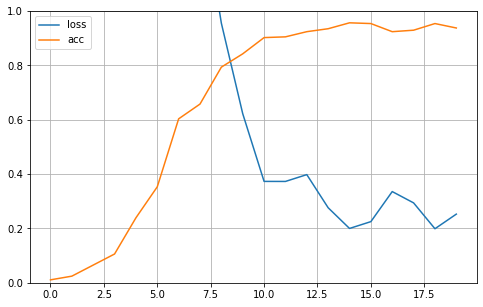

In [133]:
# Plot the training process
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
# running for agglomerative clustering (euc)

In [137]:
model_hac_euc = create_model(input, hac_euc_output )

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 90, 110, 200)      2000      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 88, 108, 200)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 86, 106, 100)      180100    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 28, 35, 100)      0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 98000)             0         
                                                                 
 dropout_2 (Dropout)         (None, 98000)            

In [138]:
model_hac_euc.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["acc"])

In [140]:
# Train the model
import tensorflow.keras as keras
history_hac_euc = model_hac_euc.fit(X_cnn_train, y_HAC_euc, # pass your cluster generated train targets
                    epochs=20,
                    callbacks=[keras.callbacks.ModelCheckpoint(
                        filepath="./checkpoints_hac")])

Epoch 1/20
12/12 [==============================] - ETA: 0s - loss: 27.5687 - acc: 0.0109

INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


12/12 [==============================] - 31s 3s/step - loss: 27.5687 - acc: 0.0109
Epoch 2/20
12/12 [==============================] - ETA: 0s - loss: 4.7112 - acc: 0.0543

INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


12/12 [==============================] - 29s 2s/step - loss: 4.7112 - acc: 0.0543
Epoch 3/20
12/12 [==============================] - ETA: 0s - loss: 4.5670 - acc: 0.0516

INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


12/12 [==============================] - 30s 2s/step - loss: 4.5670 - acc: 0.0516
Epoch 4/20
12/12 [==============================] - ETA: 0s - loss: 4.4047 - acc: 0.0870

INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


12/12 [==============================] - 35s 3s/step - loss: 4.4047 - acc: 0.0870
Epoch 5/20
12/12 [==============================] - ETA: 0s - loss: 4.1140 - acc: 0.1549

INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


12/12 [==============================] - 36s 3s/step - loss: 4.1140 - acc: 0.1549
Epoch 6/20
12/12 [==============================] - ETA: 0s - loss: 3.8941 - acc: 0.2147

INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


12/12 [==============================] - 35s 3s/step - loss: 3.8941 - acc: 0.2147
Epoch 7/20
12/12 [==============================] - ETA: 0s - loss: 4.5410 - acc: 0.0598

INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


12/12 [==============================] - 31s 2s/step - loss: 4.5410 - acc: 0.0598
Epoch 8/20
12/12 [==============================] - ETA: 0s - loss: 4.4378 - acc: 0.0951

INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


12/12 [==============================] - 30s 2s/step - loss: 4.4378 - acc: 0.0951
Epoch 9/20
12/12 [==============================] - ETA: 0s - loss: 4.2229 - acc: 0.1277

INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


12/12 [==============================] - 34s 3s/step - loss: 4.2229 - acc: 0.1277
Epoch 10/20
12/12 [==============================] - ETA: 0s - loss: 3.8188 - acc: 0.2065

INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


12/12 [==============================] - 34s 3s/step - loss: 3.8188 - acc: 0.2065
Epoch 11/20
12/12 [==============================] - ETA: 0s - loss: 3.2604 - acc: 0.2935

INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


12/12 [==============================] - 34s 3s/step - loss: 3.2604 - acc: 0.2935
Epoch 12/20
12/12 [==============================] - ETA: 0s - loss: 2.0315 - acc: 0.5516

INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


12/12 [==============================] - 37s 3s/step - loss: 2.0315 - acc: 0.5516
Epoch 13/20
12/12 [==============================] - ETA: 0s - loss: 1.2481 - acc: 0.7120

INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


12/12 [==============================] - 34s 3s/step - loss: 1.2481 - acc: 0.7120
Epoch 14/20
12/12 [==============================] - ETA: 0s - loss: 0.8110 - acc: 0.7962

INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


12/12 [==============================] - 33s 3s/step - loss: 0.8110 - acc: 0.7962
Epoch 15/20
12/12 [==============================] - ETA: 0s - loss: 0.6227 - acc: 0.8451

INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


12/12 [==============================] - 39s 3s/step - loss: 0.6227 - acc: 0.8451
Epoch 16/20
12/12 [==============================] - ETA: 0s - loss: 0.3650 - acc: 0.9103

INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


12/12 [==============================] - 37s 3s/step - loss: 0.3650 - acc: 0.9103
Epoch 17/20
12/12 [==============================] - ETA: 0s - loss: 0.3228 - acc: 0.9212

INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


12/12 [==============================] - 34s 3s/step - loss: 0.3228 - acc: 0.9212
Epoch 18/20
12/12 [==============================] - ETA: 0s - loss: 0.2344 - acc: 0.9375

INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


12/12 [==============================] - 36s 3s/step - loss: 0.2344 - acc: 0.9375
Epoch 19/20
12/12 [==============================] - ETA: 0s - loss: 0.2186 - acc: 0.9321

INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


12/12 [==============================] - 33s 3s/step - loss: 0.2186 - acc: 0.9321
Epoch 20/20
12/12 [==============================] - ETA: 0s - loss: 0.2100 - acc: 0.9511

INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


12/12 [==============================] - 33s 3s/step - loss: 0.2100 - acc: 0.9511


In [141]:
# running for agglomerative clustering (Manhatten)

In [152]:
model_hac_mah = create_model(input,hac_man_output)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 90, 110, 200)      2000      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 88, 108, 200)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 86, 106, 100)      180100    
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 28, 35, 100)      0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 98000)             0         
                                                                 
 dropout_4 (Dropout)         (None, 98000)            

In [153]:
model_hac_mah.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["acc"])

In [154]:
# Train the model
import tensorflow.keras as keras
history_hac_mah = model_hac_mah.fit(X_cnn_train,y_HAC_mah, # pass your cluster generated train targets
                    epochs=20,
                    callbacks=[keras.callbacks.ModelCheckpoint(
                        filepath="./checkpoints_hac")])

Epoch 1/20
12/12 [==============================] - ETA: 0s - loss: 33.3854 - acc: 0.0136

INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


12/12 [==============================] - 32s 3s/step - loss: 33.3854 - acc: 0.0136
Epoch 2/20
12/12 [==============================] - ETA: 0s - loss: 4.8677 - acc: 0.0326

INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


12/12 [==============================] - 29s 2s/step - loss: 4.8677 - acc: 0.0326
Epoch 3/20
12/12 [==============================] - ETA: 0s - loss: 4.4239 - acc: 0.1196

INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


12/12 [==============================] - 29s 2s/step - loss: 4.4239 - acc: 0.1196
Epoch 4/20
12/12 [==============================] - ETA: 0s - loss: 4.2128 - acc: 0.2174

INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


12/12 [==============================] - 32s 3s/step - loss: 4.2128 - acc: 0.2174
Epoch 5/20
12/12 [==============================] - ETA: 0s - loss: 4.1214 - acc: 0.2337

INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


12/12 [==============================] - 35s 3s/step - loss: 4.1214 - acc: 0.2337
Epoch 6/20
12/12 [==============================] - ETA: 0s - loss: 3.8628 - acc: 0.2473

INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


12/12 [==============================] - 36s 3s/step - loss: 3.8628 - acc: 0.2473
Epoch 7/20
12/12 [==============================] - ETA: 0s - loss: 2.9216 - acc: 0.3995

INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


12/12 [==============================] - 36s 3s/step - loss: 2.9216 - acc: 0.3995
Epoch 8/20
12/12 [==============================] - ETA: 0s - loss: 2.0861 - acc: 0.5217

INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


12/12 [==============================] - 35s 3s/step - loss: 2.0861 - acc: 0.5217
Epoch 9/20
12/12 [==============================] - ETA: 0s - loss: 1.3206 - acc: 0.6929

INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


12/12 [==============================] - 37s 3s/step - loss: 1.3206 - acc: 0.6929
Epoch 10/20
12/12 [==============================] - ETA: 0s - loss: 0.9734 - acc: 0.7554

INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


12/12 [==============================] - 38s 3s/step - loss: 0.9734 - acc: 0.7554
Epoch 11/20
12/12 [==============================] - ETA: 0s - loss: 0.5916 - acc: 0.8587

INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


12/12 [==============================] - 36s 3s/step - loss: 0.5916 - acc: 0.8587
Epoch 12/20
12/12 [==============================] - ETA: 0s - loss: 0.4378 - acc: 0.9103

INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


12/12 [==============================] - 35s 3s/step - loss: 0.4378 - acc: 0.9103
Epoch 13/20
12/12 [==============================] - ETA: 0s - loss: 0.2346 - acc: 0.9321

INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


12/12 [==============================] - 34s 3s/step - loss: 0.2346 - acc: 0.9321
Epoch 14/20
12/12 [==============================] - ETA: 0s - loss: 0.2135 - acc: 0.9293

INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


12/12 [==============================] - 34s 3s/step - loss: 0.2135 - acc: 0.9293
Epoch 15/20
12/12 [==============================] - ETA: 0s - loss: 0.3175 - acc: 0.9185

INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


12/12 [==============================] - 33s 3s/step - loss: 0.3175 - acc: 0.9185
Epoch 16/20
12/12 [==============================] - ETA: 0s - loss: 0.1909 - acc: 0.9538

INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


12/12 [==============================] - 34s 3s/step - loss: 0.1909 - acc: 0.9538
Epoch 17/20
12/12 [==============================] - ETA: 0s - loss: 0.1711 - acc: 0.9647

INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


12/12 [==============================] - 34s 3s/step - loss: 0.1711 - acc: 0.9647
Epoch 18/20
12/12 [==============================] - ETA: 0s - loss: 0.1693 - acc: 0.9538

INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


12/12 [==============================] - 36s 3s/step - loss: 0.1693 - acc: 0.9538
Epoch 19/20
12/12 [==============================] - ETA: 0s - loss: 0.3525 - acc: 0.9130  

INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


12/12 [==============================] - 1473s 134s/step - loss: 0.3525 - acc: 0.9130
Epoch 20/20
12/12 [==============================] - ETA: 0s - loss: 0.2734 - acc: 0.9402

INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


INFO:tensorflow:Assets written to: .\checkpoints_hac\assets


12/12 [==============================] - 30s 3s/step - loss: 0.2734 - acc: 0.9402


In [ ]:
#Accuracy

Kmeans : 0.9375
GMM    : 0.4457
HAC(Eucliean):0.9511
HAC(Manhatten):0.9402
    

HAC(Eucliean) is a clustering algorithm that is simple, easy to understand and implement.
It is also highly scalable and can handle large datasets with ease. 
It has the highest accuracy out of all the models compared and is thus the best choice.
    